References:  
https://www.kaggle.com/code/nitin194/twitter-sentiment-analysis-word2vec-doc2vec  
https://www.kaggle.com/code/owaistahir/lstm-sentiment-analysis/input?select=IMDB+Dataset.csv

In [86]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [87]:
n_samples=50000
dataset = pd.read_csv('data/IMDB Dataset.csv')
dataset['sentiment'] = dataset['sentiment'].replace({'positive': 1, 'negative': 0})
dataset = dataset.sample(n=n_samples, random_state=42)
dataset.columns=["tweet","label"]
dataset

,tweet,label
33553,"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam'...",1
9427,Not many television shows appeal to quite as many different kinds of fans like Farscape does...I know youngsters and 30/40+ years old;fans both Male and Female in as many different countries as yo...,1
199,"The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal's driving, but...",0
12447,"Jane Austen would definitely approve of this one!<br /><br />Gwyneth Paltrow does an awesome job capturing the attitude of Emma. She is funny without being excessively silly, yet elegant. She puts...",1
39489,"Expectations were somewhat high for me when I went to see this movie, after all I thought Steve Carell could do no wrong coming off of great movies like Anchorman, The 40 Year-Old Virgin, and Litt...",0
...,...,...
11284,"`Shadow Magic' recaptures the joy and amazement of the first movie audiences. It also shows the power of film in its ability to bring the world a little closer, overcome cultural barriers and to p...",1
44732,"I found this movie to be quite enjoyable and fairly entertaining. Good characters,good actors and enough suspense to keep your interest throughout. The plot twists might have been a bit much but o...",1
38158,"Avoid this one! It is a terrible movie. So what if it is very exciting? All it is is just pointless murders. And the whole thing with Thorn and Michael's curse, that was the absolute worst thing t...",0
860,"This production was quite a surprise for me. I absolutely love obscure early 30s movies, but I wasn't prepared for the last 25 minutes of this story. If, by any chance, you're not convinced in the...",1


In [88]:
split_point = int(len(dataset)*.8)
train=dataset[:split_point]
test=dataset[split_point:]

In [89]:
train[train['label'] == 0].head(10)

,tweet,label
199,"The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal's driving, but...",0
39489,"Expectations were somewhat high for me when I went to see this movie, after all I thought Steve Carell could do no wrong coming off of great movies like Anchorman, The 40 Year-Old Virgin, and Litt...",0
4144,"I was very disappointed with this series. It had lots of cool graphics and that's about it. The level of detail it went into was minimal, and I always got the feeling the audience was being patron...",0
36958,"The first 30 minutes of Tinseltown had my finger teetering on the remote, poised to flick around to watch something else. The premise of two writers, down on their luck, living in a self-storage-s...",0
43106,"jeez, this was immensely boring. the leading man (Christian Schoyen) has got to be the worst actor i have ever seen. and another thing, if the character in the movie moved to America when he was t...",0
6188,"It's made in 2007 and the CG is bad for a movie made in 1998. At one part in the movie there is a stop motion shot of a dinosaur that actually looks good, but this just makes the extremely amateur...",0
1414,This movie stinks majorly. The only reason I gave it a 3 was because the graphics were semi charming. It's total disregard for a plot and the lack of even insubstantial surface character developme...,0
18471,We can start with the wooden acting but this film is a disaster. Having grown up in NY I can tell you that this film is an insult to anyone who is familiar with the community or the people. I'm no...,0
37237,I'm writing this note as a chess player as well as as a movie viewer. I watched the 1997 Kasparov-Deep Blue games on the Internet. I know something about the issues that were raised. Other chess p...,0
36480,Dysfunctional family goes home for the holidays and murder and mayhem result. Violent sexy Milligan at his most home made. Little better than a home movie (as much of Milligans films are) this is ...,0


In [90]:
train[train['label'] == 1].head(10)

,tweet,label
33553,"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam'...",1
9427,Not many television shows appeal to quite as many different kinds of fans like Farscape does...I know youngsters and 30/40+ years old;fans both Male and Female in as many different countries as yo...,1
12447,"Jane Austen would definitely approve of this one!<br /><br />Gwyneth Paltrow does an awesome job capturing the attitude of Emma. She is funny without being excessively silly, yet elegant. She puts...",1
42724,"I've watched this movie on a fairly regular basis for most of my life, and it never gets old. For all the snide remarks and insults (mostly from David Spade), ""Tommy Boy"" has a giant heart. And th...",1
10822,"For once a story of hope highlighted over the tragic reality our youth face. Favela Rising draws one into a scary, unsafe and unfair world and shows through beautiful color and moving music how on...",1
49498,"Okay, I didn't get the Purgatory thing the first time I watched this episode. It seemed like something significant was going on that I couldn't put my finger on. This time those Costa Mesa fires o...",1
38695,"Great just great! The West Coast got ""Dirty"" Harry Callahan, the East Coast got Sharky. Burt Reynolds plays Sharky in ""Sharky's Machine"" and I enjoyed every minute of it. Playing a maverick narcot...",1
29282,"This movie starts off somewhat slowly and gets running towards the end. Not that that is bad, it was done to illustrate character trait degression of the main character. Consequently, if you are n...",1
15177,This is a slightly uneven entry with one standout sequence involving an over-the-hill gang reminiscing in the diner that once - thirty years previously - was their hideout; one ho-hum duologue bet...,1
34304,"I was first introduced to John Waters films by seeing ""Female trouble"" on IFC. I was disgusted but for some sick reason i enjoyed it. Then, i picked up the Pink Flamingos DVD in the John Waters Bo...",1


In [91]:
train.shape, test.shape

((40000, 2), (10000, 2))

In [92]:
train["label"].value_counts()

1    20004
0    19996
Name: label, dtype: int64

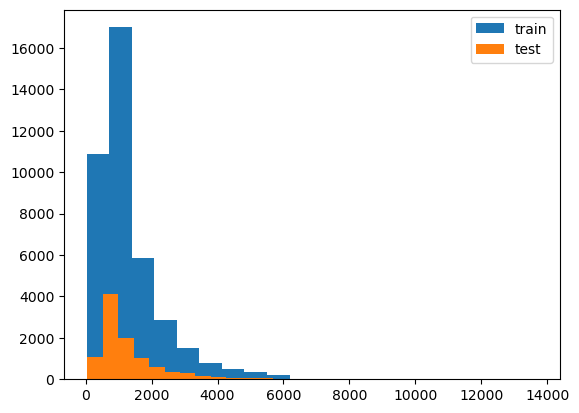

In [93]:
plt.hist(train.tweet.str.len(), bins=20, label='train')
plt.hist(test.tweet.str.len(), bins=20, label='test')
plt.legend()
plt.show()

In [94]:
combi = train.append(test, ignore_index=True, sort=True)
combi.shape

/tmp/ipykernel_1559849/2276653185.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True, sort=True)


(50000, 2)

In [95]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt


Tweet Specific Cleaning

In [96]:


combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
# print(combi['tidy_tweet'] )
combi.tidy_tweet = combi.tidy_tweet.str.replace("[^a-zA-Z#]", " ")
combi.tidy_tweet = combi.tidy_tweet.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
tokenized_tweet = combi.tidy_tweet.apply(lambda x: x.split())

/tmp/ipykernel_1559849/2398656529.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  combi.tidy_tweet = combi.tidy_tweet.str.replace("[^a-zA-Z#]", " ")


In [97]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [realli, like, thi, summerslam, look, arena, curtain, just, look, overal, interest, some, reason, anyway, thi, could, have, been, best, summerslam, ever, didn, have, luger, main, event, against, y...
1    [mani, televis, show, appeal, quit, mani, differ, kind, fan, like, farscap, doe, know, youngster, year, fan, both, male, femal, mani, differ, countri, think, that, just, ador, thi, miniseri, eleme...
2    [film, quickli, get, major, chase, scene, with, ever, increas, destruct, first, realli, thing, hijack, steven, seagal, would, have, been, beaten, pulp, seagal, drive, that, probabl, would, have, e...
3    [jane, austen, would, definit, approv, thi, gwyneth, paltrow, doe, awesom, captur, attitud, emma, funni, without, be, excess, silli, eleg, put, veri, convinc, british, accent, be, british, myself,...
4    [expect, were, somewhat, high, when, went, thi, movi, after, thought, steve, carel, could, wrong, come, great, movi, like, anchorman, year, virgin, littl, miss, sunshin, wrong

In [98]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english',binary=True)
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(50000, 1000)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [101]:
# Extracting train and test BoW features 
train_bow = bow[:40000,:] 
test_bow = bow[40000:,:] 

# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression(solver='lbfgs') 

# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.8576564798169636

In [39]:
import pickle
pickle.dump(bow_vectorizer, open("models/bow_vectorizer.sav", 'wb'))
pickle.dump(lreg, open("models/bow_senti.sav", 'wb'))
